/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_22173/3105741644.py:34: RuntimeWarning: divide by zero encountered in log10
  power_received_dbm = 10 * np.log10(power_received / 1e-3)


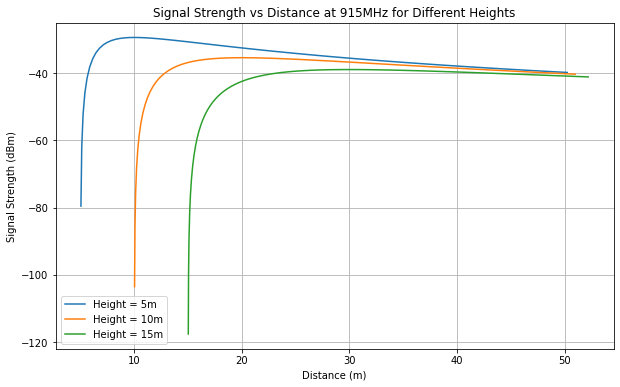

In [60]:
import math
import numpy as np
import matplotlib.pyplot as plt

class Antenna:
    def __init__(self, x, y, z, power_dbm, gain):
        self.x = x
        self.y = y
        self.z = z
        self.power = 1e-3 * 10 ** (power_dbm / 10)  # Convert power from dBm to watts
        self.gain = gain

def calculate_distance_and_angle(antenna1, antenna2):
    distance = math.sqrt((antenna1.x - antenna2.x)**2 + (antenna1.y - antenna2.y)**2 + (antenna1.z - antenna2.z)**2)
    angle = math.acos(abs(antenna1.z - antenna2.z) / distance)
    return distance, angle

def calculate_signal_strength(antenna1, antenna2, frequency):
    # Convert frequency to wavelength
    speed_of_light = 3e8  # Speed of light in m/s
    wavelength = speed_of_light / frequency

    # Calculate the distance and angle between the antennas
    distance, angle = calculate_distance_and_angle(antenna1, antenna2)

    # Calculate the gain of the antennas based on the angle
    gain1 = 10 ** (antenna1.gain / 10) * abs(math.sin(angle)**3)
    gain2 = 10 ** (antenna2.gain / 10) * abs(math.sin(angle)**3)

    # Calculate the power received
    power_received = (antenna1.power * gain1 * gain2 * wavelength ** 2) / (16 * math.pi ** 2 * distance ** 2)

    # Convert power received to dBm
    power_received_dbm = 10 * np.log10(power_received / 1e-3)

    return power_received_dbm

# Create two antennas
antenna1 = Antenna(0, 0, 0, 20, 3)  # Antenna at (0,0,0) with 20dBm power and 3dBi gain
antenna2 = Antenna(0, 0, 0, 0, 3)  # Antenna at (0,0,0) with 0W power (not transmitting) and 3dBi gain

# Calculate the signal strength at antenna2 from antenna1 at a frequency of 915MHz for different distances and heights
frequency = 915e6  # Frequency in Hz
distances = np.linspace(0, 50, 100)  # Distances from 1m to 100m
heights = [5, 10, 15]  # Heights in meters

plt.figure(figsize=(10, 6), facecolor="white")

for height in heights:
    antenna2.z = height  # Set the height of antenna2
    signal_strengths = []
    distances_3d = []
    for distance in distances:
        antenna2.x = distance  # Move antenna2 to the new distance
        signal_strength = calculate_signal_strength(antenna1, antenna2, frequency)
        signal_strengths.append(signal_strength)
        distances_3d.append(math.sqrt((antenna1.x - antenna2.x)**2 + (antenna1.y - antenna2.y)**2 + (antenna1.z - antenna2.z)**2))
    plt.plot(distances_3d, signal_strengths, label=f'Height = {height}m')

plt.xlabel('Distance (m)')
plt.ylabel('Signal Strength (dBm)')
plt.title('Signal Strength vs Distance at 915MHz for Different Heights')
plt.legend()
plt.grid(True)
plt.show()


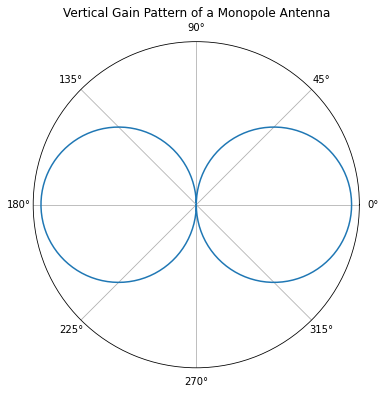

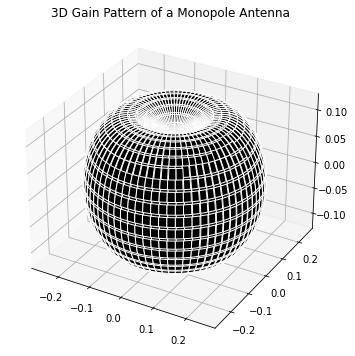

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the gain function
def gain(angle):
    return abs(np.sin(angle)**1/4)  # Gain is zero at 0 and 180 degrees

# Create a polar plot for the vertical gain
angles = np.linspace(0, 2 * np.pi, 360)  # Angles from 0 to 360 degrees
gains = gain(angles)

plt.figure(figsize=(6, 6), facecolor="white")
plt.polar(angles - np.pi / 2, gains)  # Subtract pi/2 from angles to rotate the plot
plt.yticks([])
plt.title('Vertical Gain Pattern of a Monopole Antenna')
plt.show()

# Create a 3D plot for the 3D gain
fig = plt.figure(figsize=(8, 6), facecolor="white")
ax = fig.add_subplot(111, projection='3d')

angles = np.linspace(0, 2 * np.pi, 360)
theta, phi = np.meshgrid(angles, angles)

# Convert spherical coordinates to cartesian coordinates
x = gain(phi) * np.sin(phi) * np.cos(theta)
y = gain(phi) * np.sin(phi) * np.sin(theta)
z = gain(phi) * np.cos(phi)

ax.plot_surface(x, y, z, rstride=5, cstride=5, color='k', edgecolors='w')
ax.set_title('3D Gain Pattern of a Monopole Antenna')
plt.show()
